<a href="https://colab.research.google.com/github/makarandv/music-emotion-recognition-/blob/master/ClusteringAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
df = pd.read_csv('Audio_10sec.csv')
labels = df['class'].astype('category').cat.categories.tolist()
replace_map_comp = {'class' : {k: v for k,v in zip(labels,list(range(0,len(labels))))}}
print(replace_map_comp)
df.replace(replace_map_comp, inplace=True)
print(df.head())

{'class': {'Devotional': 0, 'Happy': 1, 'Party': 2, 'Romantic': 3, 'Sad': 4}}
   Unnamed: 0  chroma_mean_0  chroma_mean_1  ...  zrate_skew       tempo  class
0           0       0.105285       0.064951  ...    0.495263   99.384014      0
1           1       0.049144       0.092795  ...    0.360199  147.656250      0
2           2       0.198394       0.322543  ...    0.381581  117.453835      0
3           3       0.037005       0.121494  ...    0.598247  117.453835      0
4           4       0.242170       0.300365  ...    0.607735   87.592691      0

[5 rows x 76 columns]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),)
(array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 19

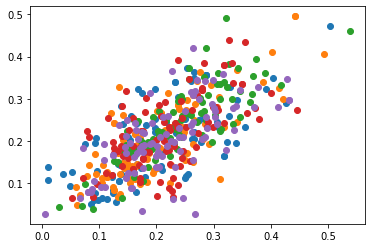

In [ ]:
# synthetic classification dataset
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
# define dataset
X = df.iloc[:, 1:75].values
y = df.iloc[:, 75].values

for class_value in range(5):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	print(row_ix)
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

(array([  0,   2,   8,  17,  21,  45,  49,  54,  66,  89,  96, 100, 101,
       102, 109, 110, 112, 119, 120, 122, 124, 125, 128, 130, 132, 138,
       139, 140, 143, 147, 148, 149, 150, 336, 346, 411]),)
(array([  1,   4,  23,  26,  31,  32,  48,  51,  52,  59,  72,  73,  76,
        93,  98, 104, 105, 106, 107, 108, 111, 114, 115, 116, 117, 118,
       126, 131, 134, 135, 136, 137, 141, 144, 145, 146, 395, 424, 429,
       455]),)
(array([  3,  11,  18,  63,  69,  80,  86, 186, 190, 200, 218, 228, 244,
       245, 254, 260, 270, 275, 280, 287, 304, 306, 310, 318, 330, 334,
       345, 358, 377, 378, 393, 394, 399, 409, 430, 440, 487, 488, 499]),)
(array([ 14,  19,  20, 103, 113, 121, 129, 133, 142, 425, 431, 443]),)
(array([  5,   6,  27,  29,  65,  70,  71,  79,  83,  85,  95, 157, 169,
       185, 191, 207, 208, 222, 230, 231, 232, 239, 247, 248, 258, 261,
       262, 303, 314, 315, 317, 323, 351, 362, 364, 373, 422, 433, 479,
       486, 491, 493, 494, 498]),)
(array([151, 152, 16

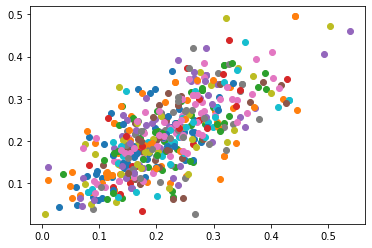

Sil coeff:  0.2833131381208451


In [ ]:
# affinity propagation clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot
# define dataset
X = df.iloc[:, 1:75].values
_ = df.iloc[:, 75].values
# define the model
model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	print(row_ix)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()
sil_avg = silhouette_score(X,yhat)
print("Sil coeff: ",sil_avg)

(array([  0,   1,   2,   4,   7,   8,   9,  14,  16,  17,  19,  20,  21,
        23,  26,  30,  31,  32,  40,  42,  45,  48,  49,  51,  52,  54,
        59,  66,  72,  73,  76,  77,  82,  89,  93,  96,  98, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 302, 311, 336, 339, 346,
       370, 389, 390, 395, 398, 401, 402, 404, 408, 411, 416, 420, 424,
       425, 429, 431, 442, 443, 451, 455, 456, 458, 465, 467, 470, 474,
       492]),)
(array([ 22,  62,  75, 151, 152, 159, 160, 161, 162, 163, 174, 175, 176,
       178, 183, 184, 187, 195, 196, 199, 201, 203, 212, 216, 220, 225,
       227, 237, 241, 243, 246, 249, 251, 252, 255, 257, 265, 271, 282,
       284, 288, 298, 299, 301, 307, 308, 313, 327, 335, 357, 365, 379,
       380, 387, 388, 391, 400, 405, 417, 426, 

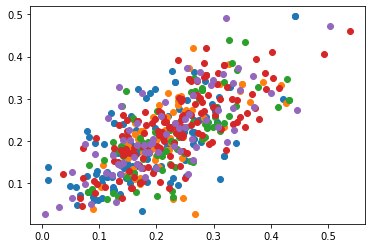

Sil coeff:  0.3387292590748674


In [ ]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define dataset
X = df.iloc[:, 1:75].values
_ = df.iloc[:, 75].values
# define the model
model = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	print(row_ix)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()
sil_avg = silhouette_score(X,yhat)
print("Sil coeff: ",sil_avg)

(array([  0,   1,   2,   4,   7,   8,   9,  14,  16,  17,  19,  20,  21,
        23,  26,  30,  31,  32,  40,  42,  45,  48,  49,  51,  52,  54,
        59,  66,  72,  73,  76,  77,  82,  89,  93,  96,  98, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 302, 311, 336, 339, 346,
       370, 389, 390, 395, 398, 401, 402, 404, 408, 411, 416, 420, 424,
       425, 429, 431, 442, 443, 451, 455, 456, 458, 465, 467, 470, 474,
       492]),)
(array([ 10,  13,  15,  24,  25,  35,  36,  37,  38,  39,  41,  43,  44,
        46,  47,  53,  55,  60,  67,  68,  78,  84,  87,  88,  90,  97,
        99, 123, 127, 158, 164, 166, 168, 182, 193, 194, 204, 238, 259,
       272, 286, 289, 291, 295, 300, 305, 309, 316, 321, 322, 324, 326,
       328, 331, 333, 338, 340, 344, 348, 349, 

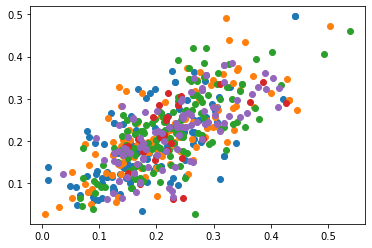

Sil coeff:  0.3314338882590812


In [ ]:
# birch clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch
from matplotlib import pyplot
# define dataset
X = df.iloc[:, 1:75].values
_ = df.iloc[:, 75].values
# define the model
model = Birch(threshold=0.01, n_clusters=5)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	print(row_ix)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()
sil_avg = silhouette_score(X,yhat)
print("Sil coeff: ",sil_avg)

(array([ 10,  13,  15,  24,  25,  30,  35,  36,  37,  38,  39,  41,  43,
        44,  46,  47,  53,  55,  60,  63,  64,  67,  68,  78,  82,  84,
        87,  88,  90,  97,  99, 123, 127, 158, 164, 166, 168, 182, 193,
       194, 200, 204, 233, 238, 245, 259, 260, 272, 286, 289, 291, 294,
       295, 300, 302, 305, 309, 311, 316, 318, 321, 322, 324, 326, 328,
       330, 331, 333, 338, 340, 344, 348, 349, 353, 354, 355, 363, 366,
       367, 369, 372, 374, 375, 376, 381, 382, 383, 384, 385, 389, 390,
       392, 398, 403, 406, 407, 412, 418, 419, 421, 423, 428, 435, 436,
       437, 438, 439, 441, 444, 445, 448, 449, 450, 452, 453, 454, 457,
       459, 460, 462, 464, 465, 466, 467, 469, 472, 475, 478, 480, 481,
       482, 483, 484, 490, 497]),)
(array([ 22,  56,  61,  85,  95, 153, 154, 155, 156, 159, 160, 167, 173,
       174, 176, 177, 178, 179, 180, 181, 187, 188, 196, 201, 202, 203,
       206, 208, 209, 211, 214, 215, 217, 221, 225, 227, 234, 235, 236,
       239, 243, 250, 251, 

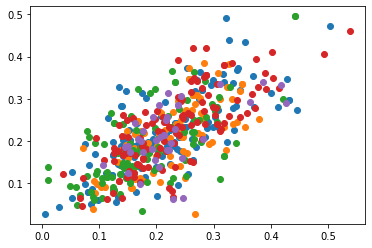

Sil coeff:  0.35481127336486895


In [ ]:
# mini-batch k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MiniBatchKMeans
from matplotlib import pyplot
# define dataset
X = df.iloc[:, 1:75].values
_ = df.iloc[:, 75].values
# define the model
model = MiniBatchKMeans(n_clusters=5)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	print(row_ix)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()
sil_avg = silhouette_score(X,yhat)
print("Sil coeff: ",sil_avg)

(array([  3,   5,   6,  10,  11,  12,  13,  15,  18,  22,  27,  28,  29,
        33,  34,  35,  39,  46,  50,  55,  56,  57,  58,  60,  61,  62,
        63,  64,  65,  67,  68,  69,  70,  71,  74,  75,  79,  80,  81,
        83,  84,  85,  86,  87,  91,  92,  94,  95,  99, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,
       220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
       233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245,
       246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258,
       260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 273,
       274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 2

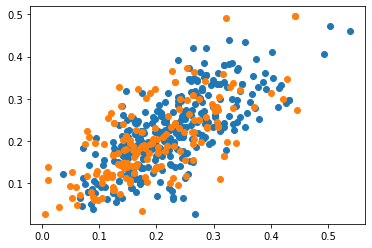

Sil coeff:  0.5122453166622097


In [ ]:
# mean shift clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift
from matplotlib import pyplot
# define dataset
X = df.iloc[:, 1:75].values
_ = df.iloc[:, 75].values
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	print(row_ix)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()
sil_avg = silhouette_score(X,yhat)
print("Sil coeff: ",sil_avg)

(array([  0,   1,   3,   4,   5,   6,   7,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  46,  47,  48,  49,  50,  51,  52,  53,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
        83,  84,  85,  86,  87,  89,  90,  91,  92,  93,  94,  95,  96,
        98,  99, 100, 102, 103, 104, 105, 106, 107, 108, 110, 111, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 164, 165, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 186, 187,
       188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 1

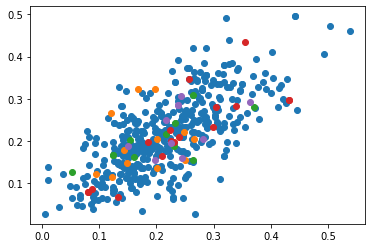

Sil coeff:  -0.34086916806540385


In [ ]:
# optics clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import OPTICS
from matplotlib import pyplot
# define dataset
X = df.iloc[:, 1:75].values
_ = df.iloc[:, 75].values
model = OPTICS(eps=0.8, min_samples=10)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	print(row_ix)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()
sil_avg = silhouette_score(X,yhat)
print("Sil coeff: ",sil_avg)

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


(array([429, 455]),)
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 

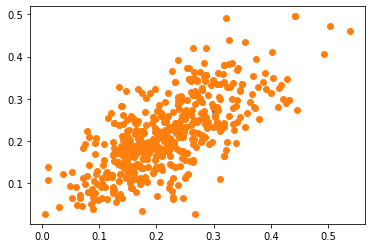

Sil coeff:  0.0813142930253735


In [ ]:
# spectral clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
# define dataset
X = df.iloc[:, 1:75].values
_ = df.iloc[:, 75].values
model = SpectralClustering(n_clusters=5)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	print(row_ix)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()
sil_avg = silhouette_score(X,yhat)
print("Sil coeff: ",sil_avg)

(array([ 62, 151, 152, 159, 160, 161, 162, 163, 173, 174, 175, 176, 178,
       179, 183, 184, 195, 196, 199, 201, 203, 206, 211, 212, 216, 220,
       225, 237, 241, 243, 246, 249, 252, 253, 255, 264, 265, 271, 282,
       284, 288, 298, 299, 301, 307, 313, 327, 335, 357, 365, 387, 388,
       391, 400, 410, 417, 426, 427, 432, 446, 463, 468, 471, 476, 477,
       485, 489, 495, 496]),)
(array([  4,   7,   9,  16,  24,  25,  30,  36,  37,  38,  40,  41,  43,
        44,  46,  47,  53,  76,  77,  78,  82,  88,  90,  97, 104, 105,
       106, 117, 123, 127, 131, 146, 204, 259, 272, 302, 305, 311, 322,
       326, 328, 333, 338, 340, 353, 369, 383, 389, 390, 398, 401, 408,
       416, 419, 420, 423, 435, 436, 441, 442, 445, 448, 450, 451, 453,
       454, 456, 458, 465, 466, 467, 469, 470, 472, 474, 480, 482, 492,
       497]),)
(array([  0,   1,   2,   8,  14,  17,  19,  20,  21,  23,  26,  31,  32,
        42,  45,  48,  49,  51,  52,  54,  59,  66,  72,  73,  89,  93,
        96,  98,

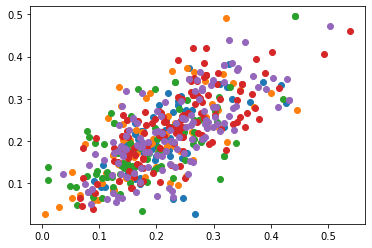

Sil coeff:  0.3501683159429698


In [ ]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define dataset
X = df.iloc[:, 1:75].values
_ = df.iloc[:, 75].values
model = GaussianMixture(n_components=5)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	print(row_ix)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()
sil_avg = silhouette_score(X,yhat)
print("Sil coeff: ",sil_avg)

In [ ]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import pandas as pd
db_df=pd.read_csv('Audio_10sec.csv')

X = df.iloc[:, 1:75].values 
labels_true = df.iloc[:, 75].values

X = StandardScaler().fit_transform(X)

In [ ]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))

Estimated number of clusters: 0
Estimated number of noise points: 500
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000


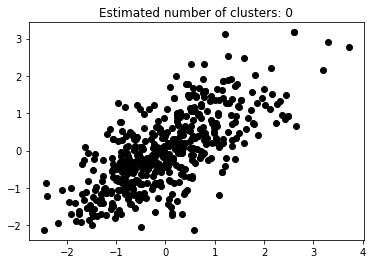

In [ ]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


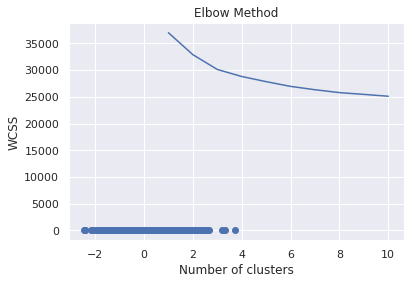

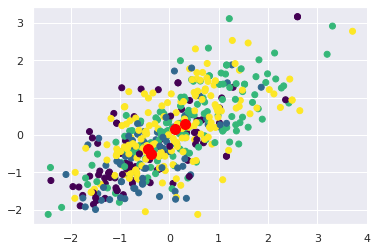

Sil coeff:  0.07316596861858116


In [ ]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()  # for plot styling

data = pd.read_csv('Audio_10sec.csv')
data.head()
x = data.iloc[:, 1:75].values
y = data.iloc[:, 75].values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x)
pd.DataFrame(data_scaled)


plt.scatter(data_scaled[:, 0], data_scaled[:, 1])



wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data_scaled)
plt.scatter(data_scaled[:,0], data_scaled[:,1],c=pred_y,  cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.show()
sil_avg = silhouette_score(x,pred_y)
print("Sil coeff: ",sil_avg)


[[ 0.34009456  0.24111011  0.16622921  0.09024381  0.11308138  0.22632803
   0.33837683  0.27830796  0.16937567  0.08376275  0.11268994  0.20380661
  -0.79787622 -0.79091658 -0.81186015 -0.79434119 -0.84691258 -0.83907386
  -0.8599537  -0.81595087 -0.87017219 -0.87595752 -0.80518497 -0.8208381
   0.81670171 -0.54597707 -0.14779898  0.36329895 -0.56524307  0.60888215
  -0.16449632  0.69589454  0.11757845  0.71068069  0.29325511  0.65094668
   0.51405172 -0.19794508 -0.41891185 -0.57223333 -0.60906496 -0.47385049
  -0.41227952 -0.56139497 -0.40336614 -0.3056465  -0.46481205 -0.44791633
  -0.53084581 -0.51528155  0.67453055  0.10562605 -0.39186073 -0.57037224
  -0.76643965 -0.98939871 -0.91765419 -0.7900604  -0.76664774  0.33303139
  -0.39763204 -0.68305282 -0.3855862  -0.42996628 -0.48443525 -0.60967678
   0.46137173  0.70184141  0.08923323 -0.33285451  0.26743412  0.15212761
  -0.23514919 -0.02804536]
 [ 0.1417516   0.10018667 -0.03964934 -0.07035574  0.01880663  0.02610269
  -0.2207068

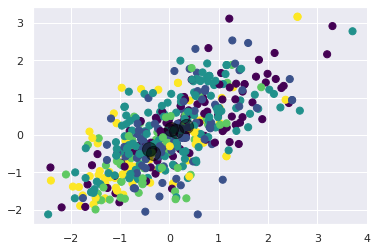

In [ ]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(data_scaled)
y_kmeans = kmeans.predict(data_scaled)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

sil_avg = silhouette_score(x,y_kmeans)
print("Sil coeff: ",sil_avg)